In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc, os ,sys
gc.collect()

Using TensorFlow backend.
/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

0

In [2]:
## load mtfs
n_up = 16
n_down = 16 #32

#folder = "/work/work_teamEXOPLANET/"
#MTF_data = np.load(folder+'/MTF_margarita/no_invertidos/MTF_u%d_d%d.npy'%(n_up,n_down))  
#TIME_data = np.load(folder+'/MTF_gabo/npys/MTF_time_u%d_d%d.npy'%(n_up,n_down))  

folder = "/media/fmena/Respaldo/KOI_LC/MTF/"
MTF_data = np.load(folder+'/normal/MTF_u%d_d%d.npy'%(n_up,n_down))  
TIME_data = np.load(folder+'/time/MTF_time_u%d_d%d.npy'%(n_up,n_down))  

x_all = []
for i in range(MTF_data.shape[0]):
    combined_image = np.dstack((MTF_data[i],TIME_data[i]))
    x_all.append(combined_image)
x_all = np.asarray(x_all)
x_all.shape

(8054, 32, 32, 2)

In [3]:
fold = "../../KOI_Data/"
df_sets = pd.read_csv(fold+"/koi_sets.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values


df_meta = pd.read_csv(fold+"/koi_metadata.csv")
df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

df_meta_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.974570,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239


In [4]:
labels_train = df_meta_train['NExScI Disposition'].values
labels_val = df_meta_test['NExScI Disposition'].values

y_train =  (labels_train =="CONFIRMED")*1
y_val =  (labels_val =="CONFIRMED")*1

x_train = x_all[mask_train]
x_val = x_all[mask_test]

print ("Objetos de entrenamiento:",x_train.shape, y_train.shape)
print ("Objetos de validación:",x_val.shape,y_val.shape)

Objetos de entrenamiento: (4387, 32, 32, 2) (4387,)
Objetos de validación: (1870, 32, 32, 2) (1870,)


In [6]:
### load model
#model = keras.models.load_model("./models/MTF_elmejor76.hdf5")
#
model = keras.models.load_model("./models/16u_32d_N.h5")

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 46, 46, 32)        608       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 10, 10, 32)        0         
____________________________________

In [24]:
probas_all = model.predict(x_all)[:,0]

class_v = ["CONFIRMED" if value >=0.5 else "FALSE POSITIVE" for value in probas_all]
df_res = pd.DataFrame({"KOI Name": df_meta["KOI Name"].values,  "Predicted Disposition": class_v,
                      "Probability": probas_all,})
df_res

,KOI Name,Predicted Disposition,Probability
0,K00889.01,CONFIRMED,9.978492e-01
1,K01009.01,FALSE POSITIVE,3.410890e-01
2,K07621.01,FALSE POSITIVE,6.303290e-02
3,K06252.01,FALSE POSITIVE,0.000000e+00
4,K00958.01,FALSE POSITIVE,4.073185e-02
5,K00984.01,CONFIRMED,7.954221e-01
6,K04162.01,FALSE POSITIVE,4.629325e-01
7,K07622.01,CONFIRMED,5.101159e-01
8,K00994.01,FALSE POSITIVE,2.290894e-01
9,K00998.01,FALSE POSITIVE,8.940697e-08


In [25]:
df_res.to_csv("CNN_MTFpred/pred.csv", index=False)

In [5]:
df_res = pd.read_csv("CNN_MTFpred/pred.csv")
probas_all = df_res["Probability"].values

probas_train = probas_all[mask_train]
probas_val = probas_all[mask_test]
df_res.head()

,KOI Name,Predicted Disposition,Probability
0,K00889.01,CONFIRMED,0.997849
1,K01009.01,FALSE POSITIVE,0.341089
2,K07621.01,FALSE POSITIVE,0.063033
3,K06252.01,FALSE POSITIVE,0.000000
4,K00958.01,FALSE POSITIVE,0.040732


,Precision raw,Recall raw,F1 raw,F1 weighted,F1 macro,F1 micro
False Positive,0.833072,0.852446,0.842648,0.791917,0.770143,0.793014
Confirmed,0.713396,0.682563,0.697639,0.791917,0.770143,0.793014


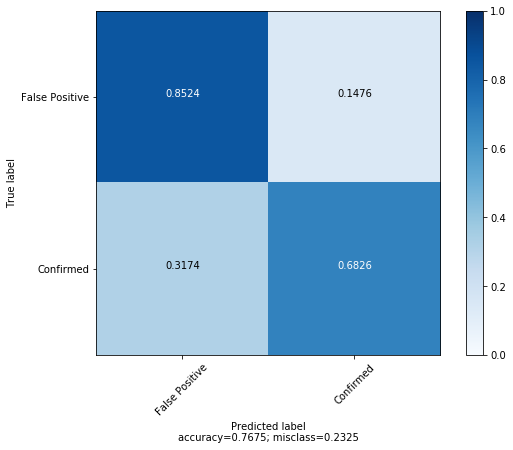

Done


In [56]:
### confusion matrix

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from evaluation import calculate_metrics, plot_ROC

y_val_hat = (probas_val >= 0.5)*1
calculate_metrics(y_val, y_val_hat ,'Confusion Matrix') 
print("Done")

In [6]:
mask_conf = (df_meta["NExScI Disposition"] == "CONFIRMED").values
mask_fp = (df_meta["NExScI Disposition"] == "FALSE POSITIVE").values
mask_SF = (pd.read_csv(fold+"/kepler_dataset.csv")["Secondary Flag"] == 1).values
#Significant Secondary: A KOI that is observed to have a significant secondary event, indicating that the transit-like event is most likely caused by an eclipsing binary. Ho
probas_plot = probas_all

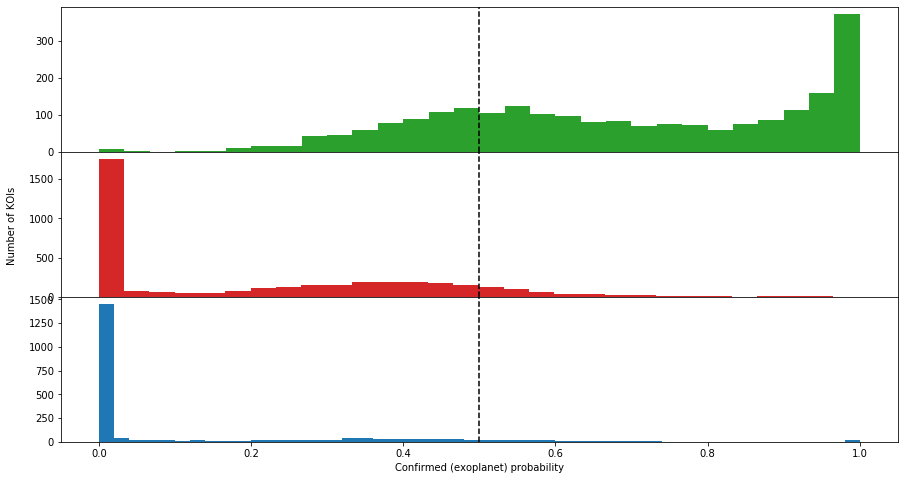

In [13]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15,8))
fig.subplots_adjust(hspace=0)

axs[0].hist(probas_plot[mask_conf], bins=30, color='tab:green')
axs[0].axvline(0.5, c='black', ls="--")

axs[1].hist(probas_plot[mask_fp], bins=30, color='tab:red')
axs[1].axvline(0.5, c='black', ls="--")

axs[2].hist(probas_plot[mask_SF], bins=50, color='tab:blue')
axs[2].set_xlabel("Confirmed (exoplanet) probability")
axs[2].axvline(0.5, c='black', ls="--")

fig.text(0.08, 0.5, 'Number of KOIs', ha='center', va='center', rotation='vertical')
plt.show()

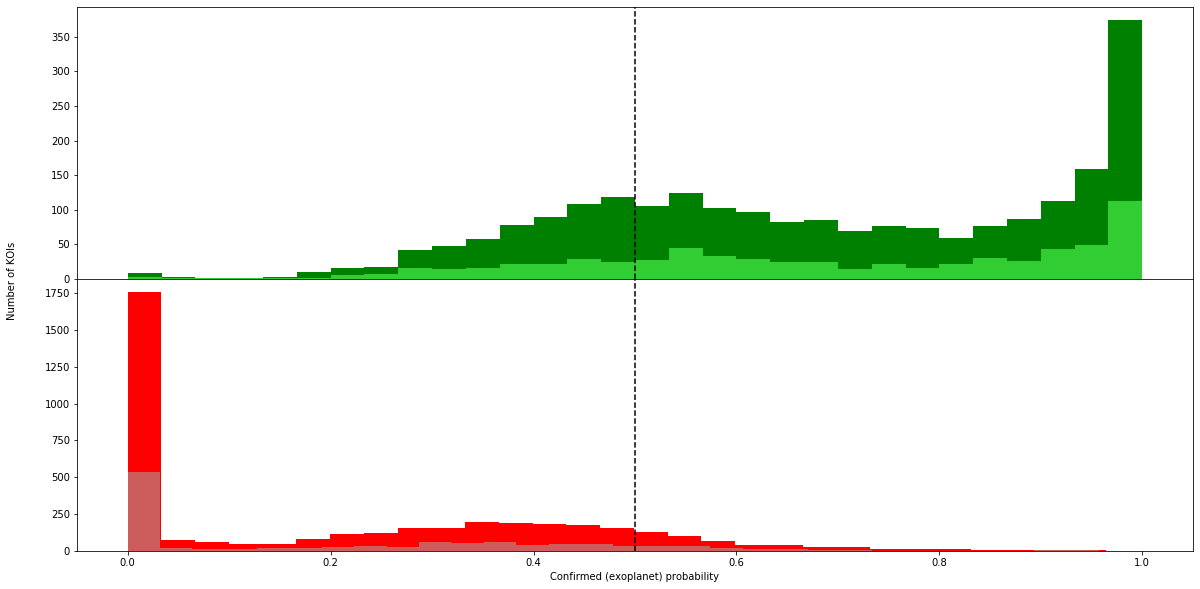

In [144]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(hspace=0)

axs[0].hist(probas_plot[mask_conf], bins=30, color='g')
axs[0].hist(probas_plot[mask_conf[mask_test]], bins=30, color='limegreen')
axs[0].axvline(0.5, c='black', ls="--")

axs[1].hist(probas_plot[mask_fp], bins=30, color='r')
axs[1].hist(probas_plot[mask_fp[mask_test]], bins=30, color='indianred')
axs[1].set_xlabel("Confirmed (exoplanet) probability")
axs[1].axvline(0.5, c='black', ls="--")

fig.text(0.08, 0.5, 'Number of KOIs', ha='center', va='center', rotation='vertical')
plt.show() #lighter test set..

In [7]:
def rank_diff(probas, value=0.5):
    probas = probas.flatten()
    print(probas)
    print(value)
    distance = np.square(probas - value)
    return np.argsort(distance)#, np.sort(distance)

## visualize several MTFS
from matplotlib.colors import LogNorm

def visualize_MTF(n_values, MTFS, PROBAS, labels, n=5, title=""):
    n_idx = np.random.choice(n_values, size=n, replace=False)
    
    f, axx = plt.subplots(1, n, figsize=(15,3))
    for i, i_dx in enumerate(n_idx):
        axx[i].imshow(MTFS[i_dx], cmap='RdPu', norm=LogNorm() )
        axx[i].set_title("Probability %.3f "%( PROBAS[i_dx]))
        axx[i].set_xlabel("Object %s"%labels[i_dx])
        axx[i].set_xticks([])
        axx[i].set_yticks([])
        
    f.suptitle(title)
    plt.show()

### DIfficult data (closer to 0.5)

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0.5


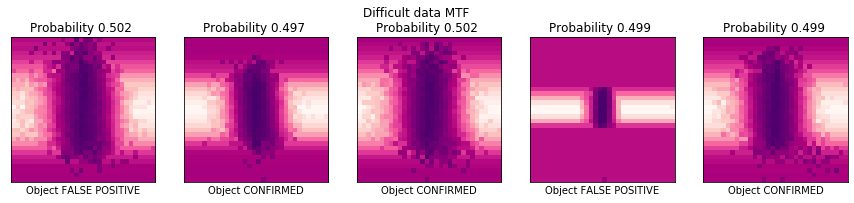

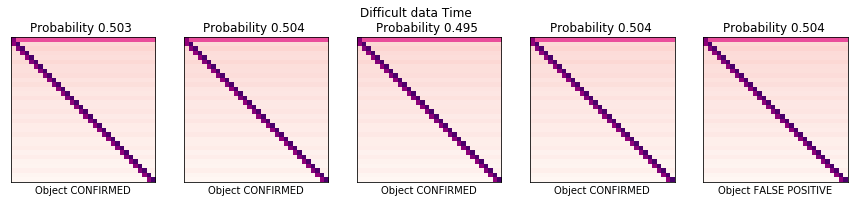

In [104]:
rank_V = rank_diff(probas_train)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Confidence data (away from 0.5)

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0.5


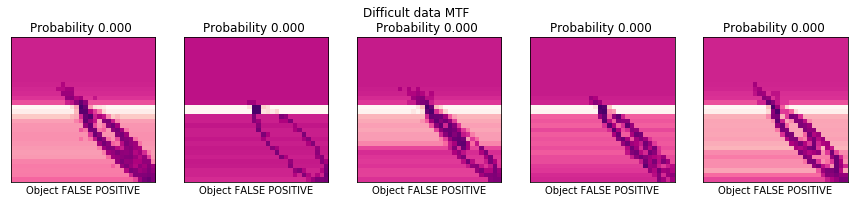

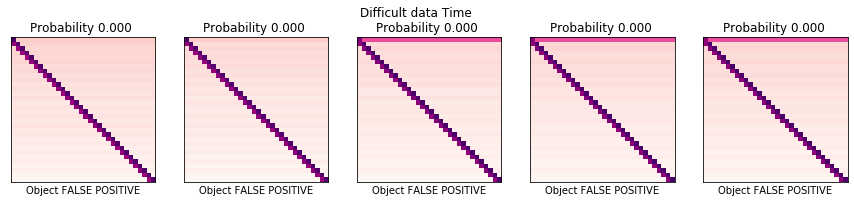

In [86]:
rank_V = rank_diff(probas_train)[::-1][:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Data confidence confirmed (close to 1)

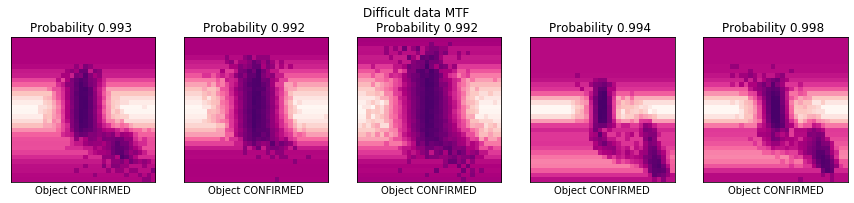

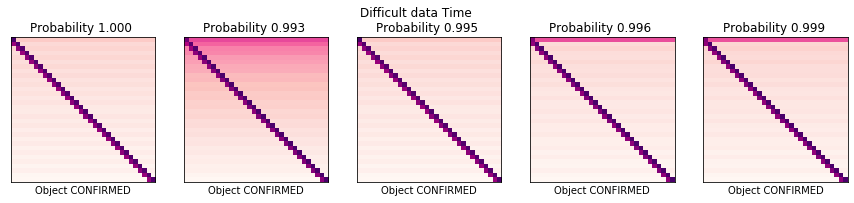

In [55]:
rank_V = rank_diff(probas_train, value=1)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
1


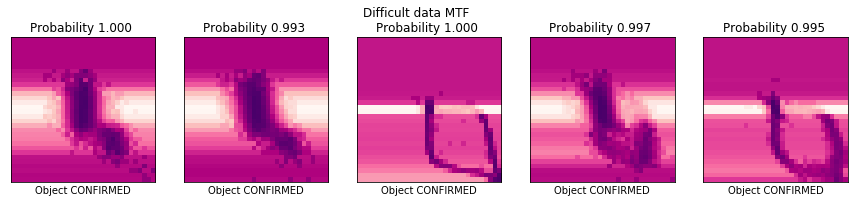

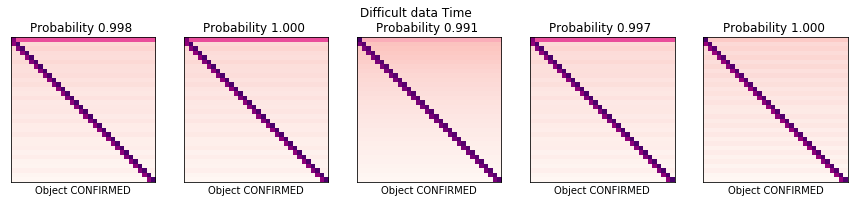

In [85]:
rank_V = rank_diff(probas_train, value=1)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Data confidence False positive (close to 0)

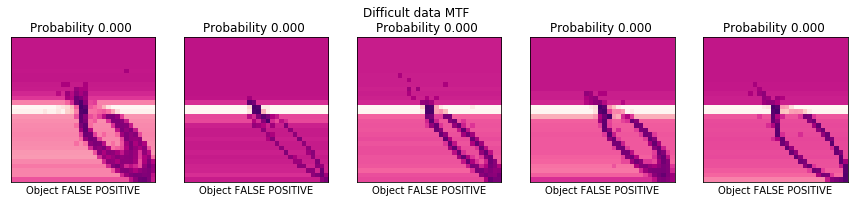

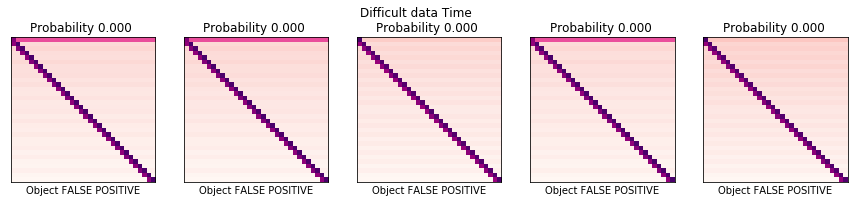

In [56]:
rank_V = rank_diff(probas_train, value=0)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0


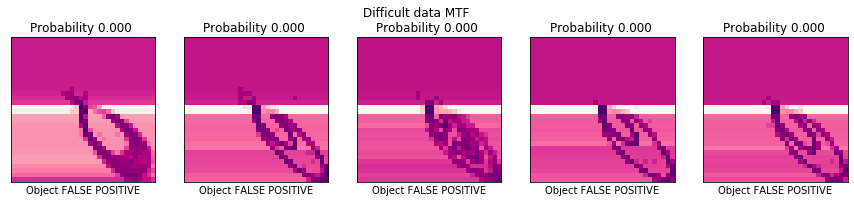

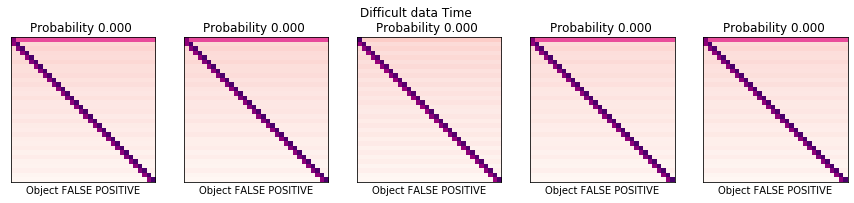

In [42]:
rank_V = rank_diff(probas_train, value=0)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### CONF MTFS

In [8]:
def perf_measure(y_actual, y_hat):
    TP = []
    FP = []
    TN = []
    FN = []

    for i in range(len(y_hat)): 
        if (y_actual[i]==y_hat[i]) and (y_hat[i]==1):
            TP.append(i)
        if  (y_actual[i]!=y_hat[i]) and (y_hat[i]==1):
            FP.append(i)
        if (y_actual[i]==y_hat[i]) and (y_hat[i]==0):
            TN.append(i)
        if (y_actual[i]!=y_hat[i]) and (y_hat[i]==0):
            FN.append(i)

    return(np.asarray(TP), np.asarray(FP), np.asarray(TN), np.asarray(FN))

def sort_list_prob(idx, prob, true_pred=True):
    indx_sort = np.argsort(prob[idx])
    if true_pred:
        indx_sort = indx_sort[::-1] #prob 1        
    return idx[indx_sort]

y_hat_val = (probas_val>=0.5)*1
y_hat_val

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
TP, FP, TN, FN = perf_measure(y_val, y_hat_val)

In [10]:
def set_images(img, ref, idx):
    img_ex = len(idx)
    size = ref.shape[-1]
    for i in range(int(img_ex/2)):
        for j in range(int(img_ex/2)):
            img[size*(i): size*(i+1), size*(j): size*(j+1)] = ref[idx[i+j]]

def plot_images_v2(ref, idx):
    img_ex = len(idx)
    fig, axx = plt.subplots(int(img_ex/2), int(img_ex/2), figsize=(10,10))

    for i in range(int(img_ex/2)):
        for j in range(int(img_ex/2)):
            axx[i,j].imshow(ref[idx_ex[i+j]] , cmap='RdPu', norm=LogNorm() )
            axx[i,j].set_axis_off()

    plt.show()

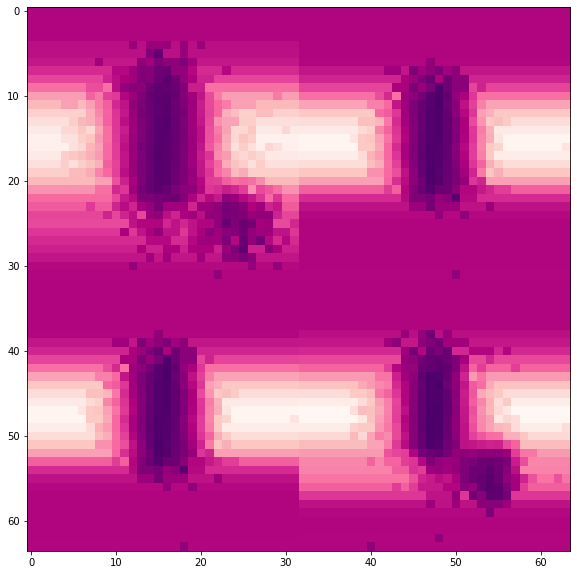

In [67]:
img_ex = 4

sub_img = np.zeros((MTF_data.shape[1]*int(img_ex/2), MTF_data.shape[1]*int(img_ex/2)))


idx_ex = np.random.choice(TP , img_ex, replace=False)

set_images(sub_img, MTF_data[mask_test], idx_ex)

plt.figure(figsize=(10,10))
plt.imshow(sub_img , cmap='RdPu', norm=LogNorm() )
plt.show()

In [ ]:
plot_images_v2(MTF_data, idx_ex)

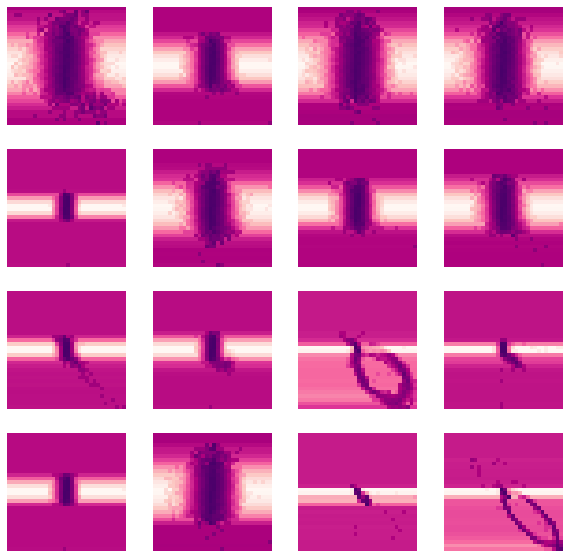

In [68]:
img_ex = 4
fig, axx = plt.subplots(img_ex, img_ex, figsize=(10,10))

#TP
k = 0
idx_ex = np.random.choice(TP , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1
        
#FP
k = 0
idx_ex = np.random.choice(FP , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1

#FN
k = 0
idx_ex = np.random.choice(FN , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1

#TN
k = 0
idx_ex = np.random.choice(TN , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1


plt.show()

In [11]:
TP = sort_list_prob(TP, probas_val)
FP = sort_list_prob(FP, probas_val)
TN = sort_list_prob(TN, probas_val, true_pred=False)
FN = sort_list_prob(FN, probas_val, true_pred=False)

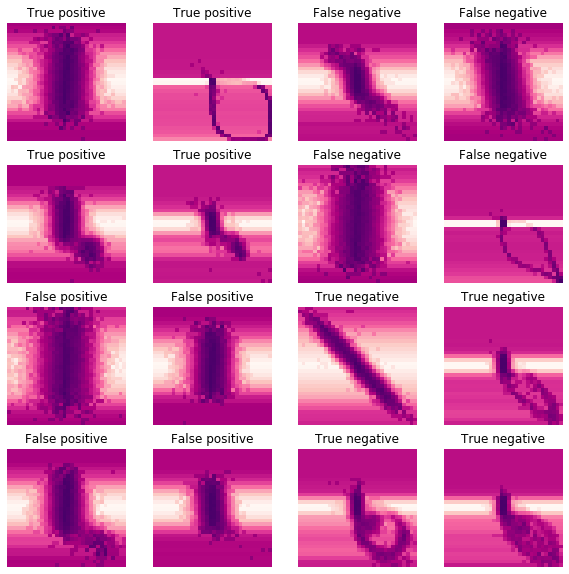

In [28]:
img_ex = 4
fig, axx = plt.subplots(img_ex, img_ex, figsize=(10,10))

#TP
k = 0
idx_ex = np.random.choice(TP[:40] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True positive")
        k +=1
        
#FP
k = 0
idx_ex = np.random.choice(FP[:10] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False positive")
        k +=1

#FN
k = 0
idx_ex = np.random.choice(FN[:10] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False negative")
        k +=1

#TN
k = 0
idx_ex = np.random.choice(TN[:10] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_test][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True negative")
        k +=1

plt.show()

> what about train??

In [52]:
y_hat_train = (probas_train>=0.5)*1

TP, FP, TN, FN = perf_measure(y_train, y_hat_train)

TP = sort_list_prob(TP, probas_train)
FP = sort_list_prob(FP, probas_train)
TN = sort_list_prob(TN, probas_train, true_pred=False)
FN = sort_list_prob(FN, probas_train, true_pred=False)

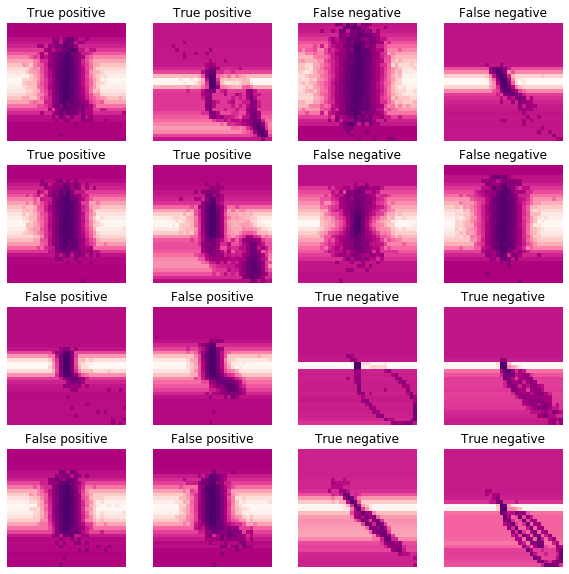

In [66]:
img_ex = 4
fig, axx = plt.subplots(img_ex, img_ex, figsize=(10,10))

#TP
k = 0
idx_ex = np.random.choice(TP[:50] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_train][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True positive")
        k +=1
        
#FP
k = 0
idx_ex = np.random.choice(FP[:50] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[mask_train][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False positive")
        k +=1

#FN
k = 0
idx_ex = np.random.choice(FN[:50] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_train][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False negative")
        k +=1

#TN
k = 0
idx_ex = np.random.choice(TN[:50] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[mask_train][idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True negative")
        k +=1

plt.show()

In [29]:
df_full_candidates = pd.read_csv("CNN_MTFpred/candidates_pred_Wmetadata.csv")

topK = 20 
indx = np.argsort(df_full_candidates["Probability"])[::-1][:topK]

df_full_candidates.iloc[indx]

,KOI Name,Predicted Disposition,Probability,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
974,K01066.01,CONFIRMED,0.999805,5.714818,355.008310,2455188.008,0.096,3.14126,12294.8,0.101,...,5695.0,4.526,-0.28,0.842,0.869,56.746,529.826,537.7,1,200
1031,K00102.01,CONFIRMED,0.999646,1.735136,135.060047,2454968.060,0.045,2.27410,952.6,0.028,...,5751.0,4.391,0.21,1.071,1.028,25.636,432.891,473.2,2,772
358,K01545.01,CONFIRMED,0.999389,5.910371,360.285248,2455193.285,0.065,3.88962,17219.2,0.121,...,6200.0,4.488,-0.28,0.958,1.029,98.695,876.292,990.3,2,144
729,K04032.05,CONFIRMED,0.999230,7.235242,135.231730,2454968.232,0.182,2.68500,60.0,0.007,...,5574.0,4.354,0.12,1.065,0.933,5.871,9.037,15.2,5,137
695,K02220.04,CONFIRMED,0.999070,7.664629,137.383420,2454970.383,0.216,3.61400,114.1,0.010,...,5640.0,4.087,0.14,1.515,1.024,4.604,9.759,13.2,5,136
1476,K02859.03,CONFIRMED,0.998998,4.288868,132.377610,2454965.378,0.534,2.59900,59.3,0.007,...,5374.0,4.555,-0.68,0.721,0.680,3.960,7.396,11.1,5,240
1478,K02859.05,CONFIRMED,0.998811,5.431036,134.417110,2454967.417,0.816,2.46900,66.8,0.008,...,5374.0,4.555,-0.68,0.721,0.680,3.029,9.414,10.8,5,214
1477,K02859.04,CONFIRMED,0.998730,2.905120,132.566930,2454965.567,0.417,2.29300,61.2,0.007,...,5374.0,4.555,-0.68,0.721,0.680,4.823,8.555,13.2,5,381
785,K00883.01,CONFIRMED,0.998647,2.688899,170.102090,2455003.102,0.001,2.11275,37491.6,0.173,...,4820.0,4.667,-0.40,0.639,0.699,120.200,1777.009,1011.6,1,499
1423,K01082.04,CONFIRMED,0.998288,9.655047,137.075050,2454970.075,0.124,2.75200,313.1,0.016,...,4999.0,4.490,0.18,0.843,0.800,2.940,7.656,12.2,4,117


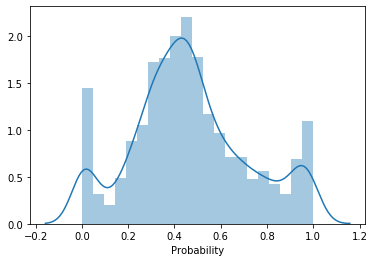

In [16]:
sns.distplot(df_full_candidates["Probability"])
plt.show()

In [17]:
#save sorted
indx = np.argsort(df_full_candidates["Probability"])[::-1]

df_new = df_full_candidates.iloc[indx]
df_new = df_new[["KOI Name", "Predicted Disposition", "Probability"]]
df_new["log(P)"] = np.log(df_new["Probability"]+1e-7)
df_new

,KOI Name,Predicted Disposition,Probability,log(P)
974,K01066.01,CONFIRMED,0.999805,-0.000195
1031,K00102.01,CONFIRMED,0.999646,-0.000354
358,K01545.01,CONFIRMED,0.999389,-0.000611
729,K04032.05,CONFIRMED,0.999230,-0.000770
695,K02220.04,CONFIRMED,0.999070,-0.000931
1476,K02859.03,CONFIRMED,0.998998,-0.001002
1478,K02859.05,CONFIRMED,0.998811,-0.001190
1477,K02859.04,CONFIRMED,0.998730,-0.001271
785,K00883.01,CONFIRMED,0.998647,-0.001353
1423,K01082.04,CONFIRMED,0.998288,-0.001714


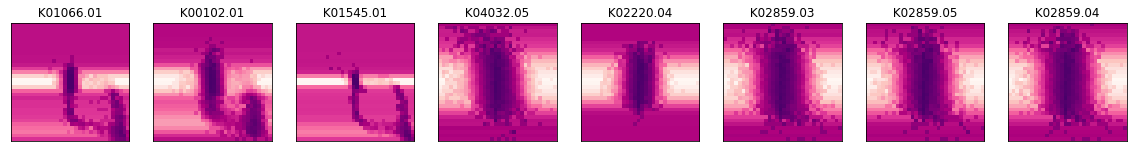

In [35]:
data = MTF_data[mask_unlabeled][indx]
PROBAS = df_full_candidates.iloc[indx]["Probability"].values
NAMES = df_full_candidates.iloc[indx]["KOI Name"].values

f, axx = plt.subplots(1, 8, figsize=(20,8))
for i in range(8):
    axx[i].imshow(data[i], cmap='RdPu', norm=LogNorm() )
    #axx[i].set_title("Probability %.3f "%( PROBAS[i]))
    axx[i].set_title(" %s "%( NAMES[i]))
    #axx[i].set_xlabel("Object %s"%labels[i_dx])
    axx[i].set_xticks([])
    axx[i].set_yticks([])

#f.suptitle(title)
plt.show()